In [1]:
%cd -q ..

import logging

import graphviz

logging.basicConfig(format='[%(levelname)s@%(name)s] %(message)s', level=logging.DEBUG)

graphviz.__version__, graphviz.version()

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-V']


('0.20.dev0', (2, 40, 1))

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


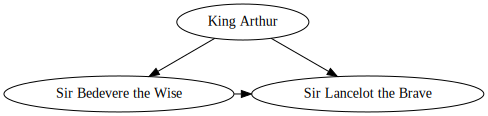

In [2]:
dot = graphviz.Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

dot

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


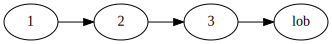

In [3]:
src = graphviz.Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
src

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


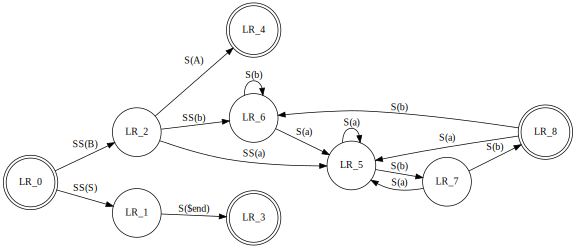

In [4]:
# http://www.graphviz.org/content/fsm

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')

f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


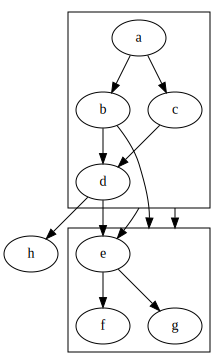

In [5]:
# http://www.graphviz.org/pdf/dotguide.pdf, Figure 20

g = graphviz.Digraph('G', filename='cluster_edge.gv')

g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g